In [1]:
from nltk.corpus import reuters
import nltk
#nltk.download('reuters')
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

## Getting train and test dataset from nltk reuters corpus

In [2]:
train_documents, train_categories = zip(*[(reuters.raw(i), reuters.categories(i)) for i in reuters.fileids() if i.startswith('training/')])
test_documents, test_categories = zip(*[(reuters.raw(i), reuters.categories(i)) for i in reuters.fileids() if i.startswith('test/')])

In [201]:
filename = []
for i in reuters.fileids():
    if i.startswith('training/'):
        filename.append(i)

In [30]:
reuters.raw('training/10')

"COMPUTER TERMINAL SYSTEMS &lt;CPML> COMPLETES SALE\n  Computer Terminal Systems Inc said\n  it has completed the sale of 200,000 shares of its common\n  stock, and warrants to acquire an additional one mln shares, to\n  &lt;Sedio N.V.> of Lugano, Switzerland for 50,000 dlrs.\n      The company said the warrants are exercisable for five\n  years at a purchase price of .125 dlrs per share.\n      Computer Terminal said Sedio also has the right to buy\n  additional shares and increase its total holdings up to 40 pct\n  of the Computer Terminal's outstanding common stock under\n  certain circumstances involving change of control at the\n  company.\n      The company said if the conditions occur the warrants would\n  be exercisable at a price equal to 75 pct of its common stock's\n  market price at the time, not to exceed 1.50 dlrs per share.\n      Computer Terminal also said it sold the technolgy rights to\n  its Dot Matrix impact technology, including any future\n  improvements, to &lt;

In [3]:
print("Number of training documents:", len(train_documents))
print("Number of testing documents:", len(test_documents))

Number of training documents: 7769
Number of testing documents: 3019


In [4]:
## distribution of document number per category

In [5]:
## distribution of word counts per document

## Convert the categorical labels to Multi Label Encodings

In [6]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
train_labels = mlb.fit_transform(train_categories)
test_labels = mlb.transform(test_categories)

In [7]:
train_labels = pd.DataFrame(train_labels)
train_labels.columns = mlb.classes_

test_labels = pd.DataFrame(test_labels)
test_labels.columns = mlb.classes_

whole_data = pd.concat([train_labels, test_labels], axis = 0).reset_index(drop = True)
whole_data

acq  alum  barley  bop  carcass  castor-oil  cocoa  coconut  \
0        0     0       0    0        0           0      1        0   
1        1     0       0    0        0           0      0        0   
2        0     0       0    0        0           0      0        0   
3        1     0       0    0        0           0      0        0   
4        0     0       0    0        0           0      0        0   
...    ...   ...     ...  ...      ...         ...    ...      ...   
10783    1     0       0    0        0           0      0        0   
10784    0     0       0    0        0           0      0        0   
10785    0     0       0    0        0           0      0        0   
10786    0     0       0    0        0           0      0        0   
10787    0     0       0    0        0           0      0        0   

       coconut-oil  coffee  ...  sun-oil  sunseed  tea  tin  trade  veg-oil  \
0                0       0  ...        0        0    0    0      0        0   
1                0       0  ...        0        0    0    0      0        0   
2                0       0  ...        0        0    0    0      0        0   
3                0       0  ...        0        0    0    0      0        0   
4                0       0  ...        0        0    0    0      0        0   
...            ...     ...  ...      ...      ...  ...  ...    ...      ...   
10783            0       0  ...        0        0    0    0      0        0   
10784            0       0  ...        0        0    0    0      0        0   
10785            0       0  ...        0        0    0    0      0        0   
10786            0       0  ...        0        0    0    0      0        0   
10787            0       0  ...        0        0    0    0      0        0   

       wheat  wpi  yen  zinc  
0          0    0    0     0  
1          0    0    0     0  
2          0    0    0     0  
3          0    0    0     0  
4          0    0    0     0  
...      ...  ...  ...   ...  
10783      0    0    0     0  
10784      0    0    1     0  
10785      0    0    0     0  
10786      0    0    0     0  
10787      0    0    0     0  

[10788 rows x 90 columns]

### distribution of category number per document

In [8]:
cat_num_doc = whole_data.sum(1)
cat_num_doc = pd.DataFrame(cat_num_doc)
cat_num_doc.columns = ['cat_num_doc']

In [9]:
cat_num_doc.mean()

cat_num_doc    1.235447
dtype: float64

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

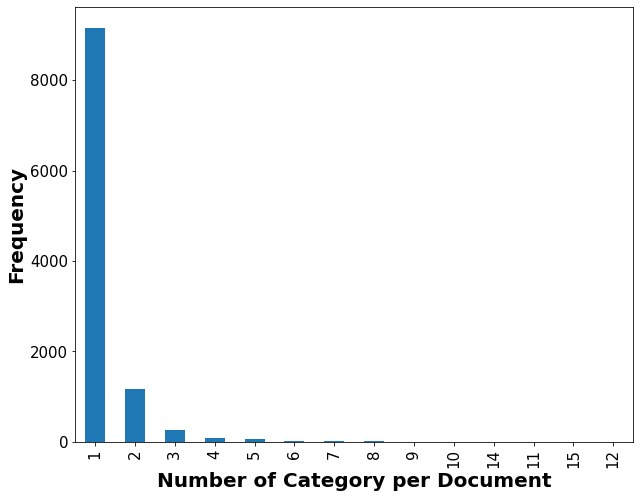

In [10]:
fig, axs = plt.subplots(1,1,figsize=(10,8)) 
cat_num_doc["cat_num_doc"].value_counts().plot(ax=axs, kind='bar')

plt.xlabel('Number of Category per Document',fontsize=20, weight = 'bold')
plt.ylabel('Frequency',fontsize=20, weight = 'bold') 

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

### distribution of doc number per category

In [11]:
doc_num_cat = whole_data.sum(0)
doc_num_cat = pd.DataFrame(doc_num_cat)
doc_num_cat.columns = ['doc_num_cat']
doc_num_cat = doc_num_cat.sort_values(by = ['doc_num_cat'], ascending = False)
doc_num_cat = doc_num_cat.reset_index()


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

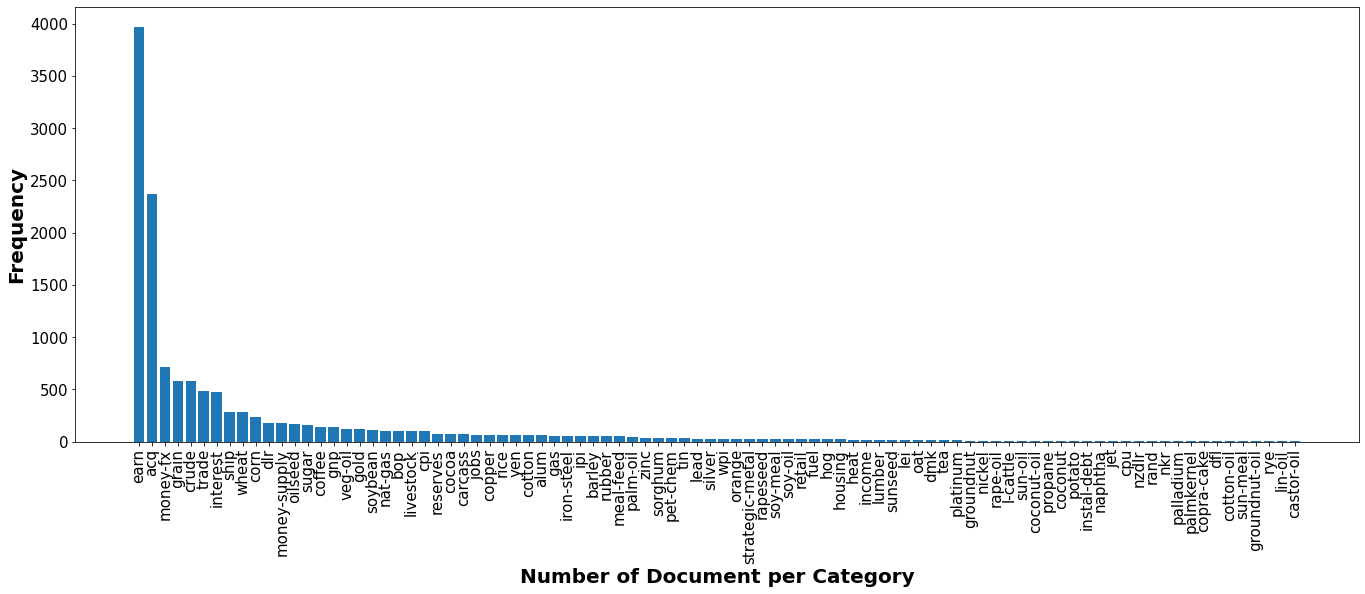

In [12]:
fig, axs = plt.subplots(1,1,figsize=(23,8)) 

plt.bar(doc_num_cat['index'], doc_num_cat['doc_num_cat'])

plt.xlabel('Number of Document per Category',fontsize=20, weight = 'bold')
plt.ylabel('Frequency',fontsize=20, weight = 'bold') 

plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)

## Creating Dataframe for applying transformations

In [13]:
trainData = {"content": train_documents}
testData = {"content": test_documents}
trainDf = pd.DataFrame(trainData, columns=["content"])
testDf = pd.DataFrame(testData, columns=["content"])

In [14]:
whole_data = pd.concat([trainDf, testDf], axis = 0).reset_index(drop = True)

In [15]:
wordcount_file = [len(i.strip()) for i in whole_data['content']]
np.mean(wordcount_file)

814.9999073044123

In [16]:
tmp = []
for i in wordcount_file:
    if i <=500:
        tmp.append(i)
len(tmp) 

5106

In [17]:
np.std(wordcount_file)

883.1324548422452

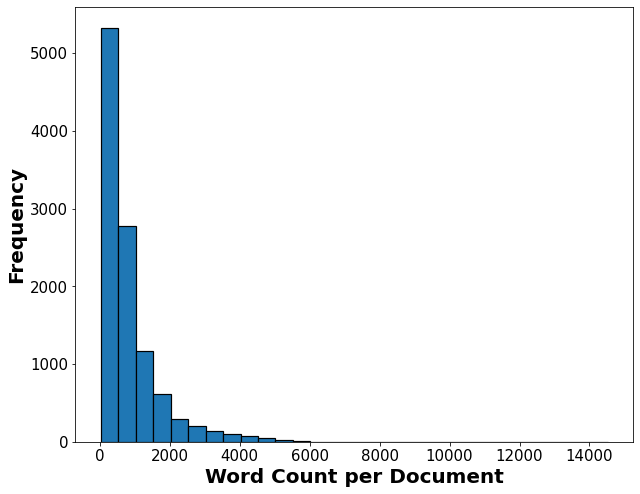

In [18]:
fig, axs = plt.subplots(1,1,figsize=(10,8)) 

binwidth = 500
plt.hist(wordcount_file, bins=range(min(wordcount_file), max(wordcount_file) + binwidth, binwidth), edgecolor='black', linewidth=1.2)

plt.xlabel('Word Count per Document',fontsize=20, weight = 'bold')
plt.ylabel('Frequency',fontsize=20, weight = 'bold') 

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


plt.show()

## Pre-process the input data

In [19]:
wordnet_lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stopwords = set(w.rstrip() for w in open("../../nltk_data/corpora/reuters/stopwords"))

def tokenize_lemma_stopwords(text):
    text = text.replace("\n", " ")
    tokens = nltk.tokenize.word_tokenize(text.lower()) # split string into words (tokens)
    tokens = [t for t in tokens if t.isalpha()] # keep strings with only alphabets
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [stemmer.stem(t) for t in tokens]
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
    cleanedText = " ".join(tokens)
    return cleanedText

def dataCleaning(df):
    data = df.copy()
    data["content"] = data["content"].apply(tokenize_lemma_stopwords)
    return data

In [20]:
cleanedTrainData = dataCleaning(trainDf)
cleanedTestData = dataCleaning(testDf)

In [24]:
trainDf['content'][1]

"COMPUTER TERMINAL SYSTEMS &lt;CPML> COMPLETES SALE\n  Computer Terminal Systems Inc said\n  it has completed the sale of 200,000 shares of its common\n  stock, and warrants to acquire an additional one mln shares, to\n  &lt;Sedio N.V.> of Lugano, Switzerland for 50,000 dlrs.\n      The company said the warrants are exercisable for five\n  years at a purchase price of .125 dlrs per share.\n      Computer Terminal said Sedio also has the right to buy\n  additional shares and increase its total holdings up to 40 pct\n  of the Computer Terminal's outstanding common stock under\n  certain circumstances involving change of control at the\n  company.\n      The company said if the conditions occur the warrants would\n  be exercisable at a price equal to 75 pct of its common stock's\n  market price at the time, not to exceed 1.50 dlrs per share.\n      Computer Terminal also said it sold the technolgy rights to\n  its Dot Matrix impact technology, including any future\n  improvements, to &lt;

In [25]:
cleanedTrainData['content'][1]

'comput termin system cpml complet sale comput termin system complet sale share common stock warrant acquir addit mln share sedio lugano switzerland dlr compani warrant exercis year purchas price dlr share comput termin sedio buy addit share increas total hold pct comput termin outstand common stock circumst involv chang control compani compani condit occur warrant exercis price equal pct common stock market price time exceed dlr share comput termin sold technolgi dot matrix impact technolog includ ani futur improv woodco houston tex dlr continu exclus worldwid license technolog woodco compani move part reorgan plan pay current oper cost ensur product deliveri comput termin make comput gener label form tag ticket printer termin'

# Create TF-IDF Vectorizer (Bag of Words)

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

vectorizer = TfidfVectorizer()
vectorised_train_documents = vectorizer.fit_transform(cleanedTrainData["content"])
vectorised_test_documents = vectorizer.transform(cleanedTestData["content"])

In [87]:
vectorised_train_documents.shape

(7769, 16898)

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, hamming_loss

ModelsPerformance = {}

def metricsReport(modelName, test_labels, predictions):
    accuracy = accuracy_score(test_labels, predictions)

    macro_precision = precision_score(test_labels, predictions, average='macro')
    macro_recall = recall_score(test_labels, predictions, average='macro')
    macro_f1 = f1_score(test_labels, predictions, average='macro')

    weighted_precision = precision_score(test_labels, predictions, average='weighted')
    weighted_recall = recall_score(test_labels, predictions, average='weighted')
    weighted_f1 = f1_score(test_labels, predictions, average='weighted')
    hamLoss = hamming_loss(test_labels, predictions)
    print("------" + modelName + " Model Metrics-----")
    print("Accuracy: {:.4f}\nHamming Loss: {:.4f}\nPrecision:\n  - Macro: {:.4f}\n  - weighted: {:.4f}\nRecall:\n  - Macro: {:.4f}\n  - weighted: {:.4f}\nF1-measure:\n  - Macro: {:.4f}\n  - weighted: {:.4f}"\
          .format(accuracy, hamLoss, macro_precision, weighted_precision, macro_recall, weighted_recall, macro_f1, weighted_f1))
    ModelsPerformance[modelName] = weighted_f1

In [90]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

svmClassifier = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svmClassifier.fit(vectorised_train_documents, train_labels)

svmPreds = svmClassifier.predict(vectorised_test_documents)
metricsReport("SVC Sq. Hinge Loss", test_labels, svmPreds)

------SVC Sq. Hinge Loss Model Metrics-----
Accuracy: 0.8115
Hamming Loss: 0.0034
Precision:
  - Macro: 0.6485
  - weighted: 0.9182
Recall:
  - Macro: 0.3961
  - weighted: 0.8007
F1-measure:
  - Macro: 0.4680
  - weighted: 0.8433


In [97]:
res = svmPreds.sum(1)
pd.DataFrame(res).value_counts()

1    2457
2     281
0     242
3      20
5       9
6       5
4       5
dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

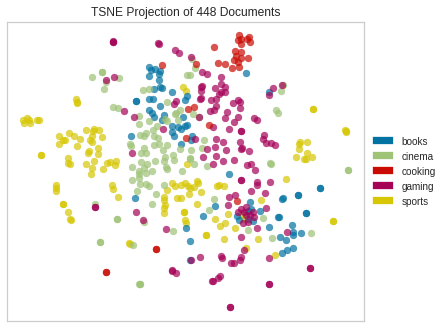

<AxesSubplot:title={'center':'TSNE Projection of 448 Documents'}>

In [29]:
from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
corpus = load_hobbies()
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(corpus.data)
y = corpus.target

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

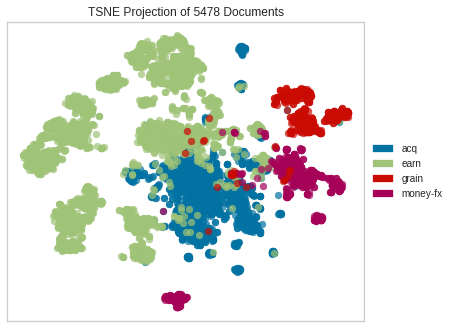

<AxesSubplot:title={'center':'TSNE Projection of 5478 Documents'}>

In [30]:
from yellowbrick.text import TSNEVisualizer

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()

y = []
index = []
for i in range(len(train_labels)):
    if train_labels['earn'][i] == 1:
        index.append(i)
        y.append('earn')
    elif train_labels['acq'][i] == 1:
        index.append(i)
        y.append('acq')
    elif train_labels['money-fx'][i] == 1:
        index.append(i)
        y.append('money-fx')
    elif train_labels['grain'][i] == 1:
        index.append(i)
        y.append('grain')
        
tsne.fit(vectorised_train_documents[index,:], y)
tsne.show()

In [31]:
import time
from sklearn.manifold import TSNE

df_subset = pd.DataFrame(vectorised_train_documents[index,:])
data_subset = vectorised_train_documents[index,:]
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5478 samples in 0.001s...
[t-SNE] Computed neighbors for 5478 samples in 1.284s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5478
[t-SNE] Computed conditional probabilities for sample 2000 / 5478
[t-SNE] Computed conditional probabilities for sample 3000 / 5478
[t-SNE] Computed conditional probabilities for sample 4000 / 5478
[t-SNE] Computed conditional probabilities for sample 5000 / 5478
[t-SNE] Computed conditional probabilities for sample 5478 / 5478
[t-SNE] Mean sigma: 0.340007
[t-SNE] KL divergence after 250 iterations with early exaggeration: 111.122711
[t-SNE] KL divergence after 300 iterations: 3.397719
t-SNE done! Time elapsed: 11.69812273979187 seconds


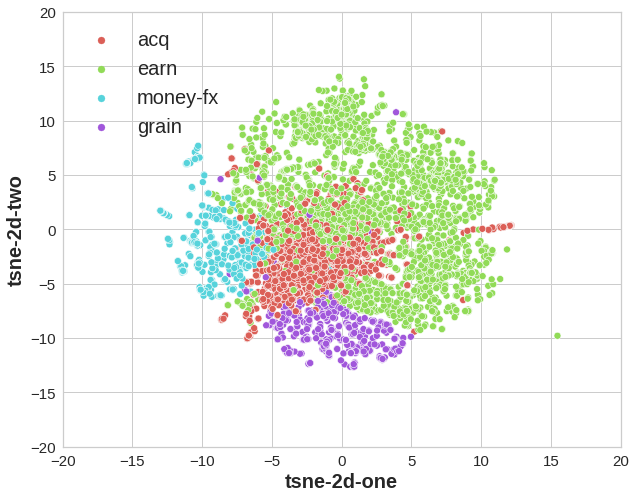

In [32]:
import seaborn as sns
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['y'] = y
plt.figure(figsize=(10,8))
plt.xlim(-20, 20)
plt.ylim(-20, 20)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=1
)
plt.xlabel('tsne-2d-one',fontsize=20, weight = 'bold')
plt.ylabel('tsne-2d-two',fontsize=20, weight = 'bold') 

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.legend(fontsize = 20)

## embedding pretrained word2vec

In [37]:
train_word2vec = pd.read_csv('embedding_pretrain_word2vec_train_retrain.csv')
train_word2vec = train_word2vec.iloc[:, 1:].values

In [38]:
import time
from sklearn.manifold import TSNE

df_subset = pd.DataFrame(train_word2vec[index,:])
data_subset = train_word2vec[index,:]
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5478 samples in 0.136s...
[t-SNE] Computed neighbors for 5478 samples in 14.241s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5478
[t-SNE] Computed conditional probabilities for sample 2000 / 5478
[t-SNE] Computed conditional probabilities for sample 3000 / 5478
[t-SNE] Computed conditional probabilities for sample 4000 / 5478
[t-SNE] Computed conditional probabilities for sample 5000 / 5478
[t-SNE] Computed conditional probabilities for sample 5478 / 5478
[t-SNE] Mean sigma: 1148.261403
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.120743
[t-SNE] KL divergence after 300 iterations: 2.440581
t-SNE done! Time elapsed: 22.31369972229004 seconds


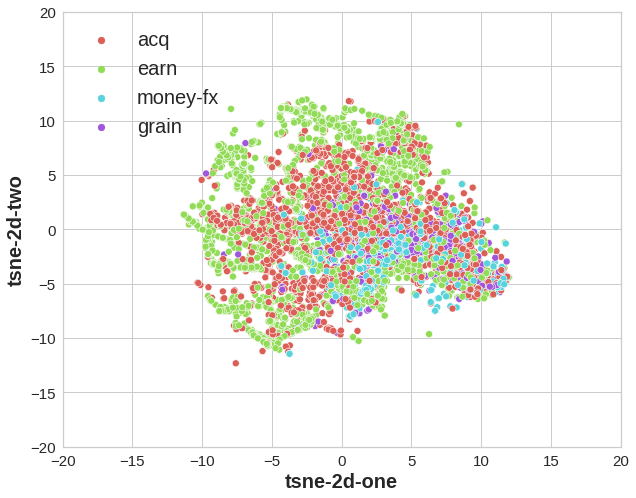

In [39]:
import seaborn as sns
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['y'] = y
plt.figure(figsize=(10,8))
plt.xlim(-20, 20)
plt.ylim(-20, 20)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=1
)
plt.xlabel('tsne-2d-one',fontsize=20, weight = 'bold')
plt.ylabel('tsne-2d-two',fontsize=20, weight = 'bold') 

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.legend(fontsize = 20)

## embedding retrained word2vec

In [33]:
train_word2vec = pd.read_csv('embedding_word2vec_train_retrain.csv')
train_word2vec = train_word2vec.iloc[:, 1:].values

In [34]:
import time
from sklearn.manifold import TSNE

df_subset = pd.DataFrame(train_word2vec[index,:])
data_subset = train_word2vec[index,:]
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5478 samples in 0.415s...
[t-SNE] Computed neighbors for 5478 samples in 58.368s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5478
[t-SNE] Computed conditional probabilities for sample 2000 / 5478
[t-SNE] Computed conditional probabilities for sample 3000 / 5478
[t-SNE] Computed conditional probabilities for sample 4000 / 5478
[t-SNE] Computed conditional probabilities for sample 5000 / 5478
[t-SNE] Computed conditional probabilities for sample 5478 / 5478
[t-SNE] Mean sigma: 0.458252
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.651321
[t-SNE] KL divergence after 300 iterations: 2.089117
t-SNE done! Time elapsed: 74.60465216636658 seconds


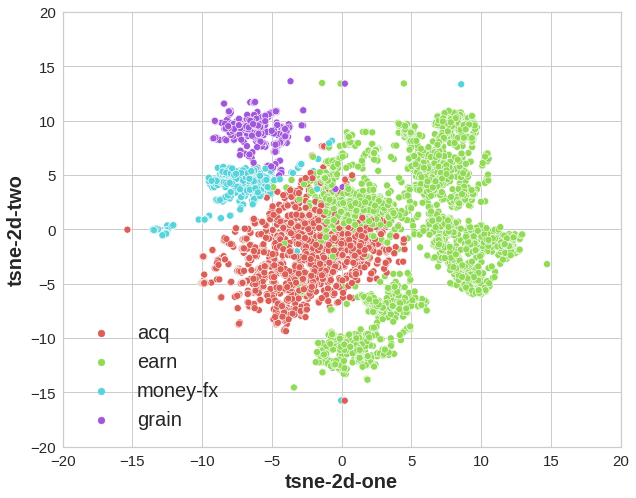

In [35]:
import seaborn as sns
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['y'] = y
plt.figure(figsize=(10,8))
plt.xlim(-20, 20)
plt.ylim(-20, 20)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=1
)
plt.xlabel('tsne-2d-one',fontsize=20, weight = 'bold')
plt.ylabel('tsne-2d-two',fontsize=20, weight = 'bold') 

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.legend(fontsize = 20)

## Visualize Confusion matrix for Bi-LSTM

In [111]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import collections
import seaborn as sns

In [112]:
LSTM_pred = pd.read_csv('LSTM_pred.csv')
label_test = pd.read_csv('Test_labels.csv')

In [113]:
LSTM_pred = LSTM_pred.iloc[:, 1:].values
label_test = label_test.iloc[:, 1:].values

In [114]:
pd.DataFrame(LSTM_pred.sum(1)).value_counts()

1.0     2499
2.0      377
3.0       57
0.0       46
4.0       17
5.0       13
6.0        5
12.0       2
7.0        2
10.0       1
dtype: int64

In [115]:
object_class = mlb.classes_

In [116]:
predict_label = []
for i in range(LSTM_pred.shape[0]):
    tmp = ''
    for k in range(LSTM_pred.shape[1]):
        if LSTM_pred[i, k] == 1:
            if tmp != '':
                tmp += ', '

            tmp += object_class[k]
            

    predict_label.append(tmp)
    
target_label = []
for i in range(label_test.shape[0]):
    tmp = ''
    for k in range(label_test.shape[1]):
        if label_test[i, k] == 1:
            if tmp != '':
                tmp += ', '
                
            tmp += object_class[k]


    target_label.append(tmp)
    
counter=collections.Counter(target_label)

counter = pd.DataFrame.from_dict(counter, orient='index').reset_index()
counter.columns = ['object_combinations', 'frequency']
counter = counter.sort_values(by = ['frequency'], ascending=False).reset_index(drop = True)
counter

object_combinations  frequency
0                         earn       1083
1                          acq        696
2                        crude        121
3                     money-fx         87
4                     interest         81
..                         ...        ...
222                  acq, alum          1
223     cpi, gnp, money-supply          1
224  grain, meal-feed, oilseed          1
225             gold, platinum          1
226    dlr, dmk, money-fx, yen          1

[227 rows x 2 columns]

In [139]:
label_test_pd = pd.DataFrame(label_test, columns = object_class)
res = []
for label in object_class:
    tmp = label_test_pd[label_test_pd[label] == 1]
    tmp = tmp.drop_duplicates()
    res.append(len(tmp))

In [140]:
res = pd.DataFrame(res)
res['label'] = object_class
res

0    label
0   16      acq
1    5     alum
2    9   barley
3    8      bop
4   10  carcass
..  ..      ...
85  23  veg-oil
86  26    wheat
87   2      wpi
88   5      yen
89   4     zinc

[90 rows x 2 columns]

In [141]:
majority_class = counter[counter['frequency'] > 30]['object_combinations'].values
majority_class

array(['earn', 'acq', 'crude', 'money-fx', 'interest', 'trade',
       'interest, money-fx', 'crude, ship', 'ship', 'grain, wheat'],
      dtype=object)

In [38]:
majority_class = counter[counter['frequency'] > 30]['object_combinations'].values

target_label_maj = []
predict_label_maj = []
for i in range(len(target_label)):
    if target_label[i] in majority_class:
        target_label_maj.append(target_label[i])
    else:
        target_label_maj.append('Others')
        
    if predict_label[i] in majority_class:
        predict_label_maj.append(predict_label[i])
    else:
        predict_label_maj.append('Others')

'''
for i in range(len(target_label)):
    if target_label[i] in majority_class:
        target_label_maj.append(target_label[i])
        predict_label_maj.append(predict_label[i])
        
    else:
        target_label_maj.append('Others')
        predict_label_maj.append(predict_label[i])
'''

"\nfor i in range(len(target_label)):\n    if target_label[i] in majority_class:\n        target_label_maj.append(target_label[i])\n        predict_label_maj.append(predict_label[i])\n        \n    else:\n        target_label_maj.append('Others')\n        predict_label_maj.append(predict_label[i])\n"

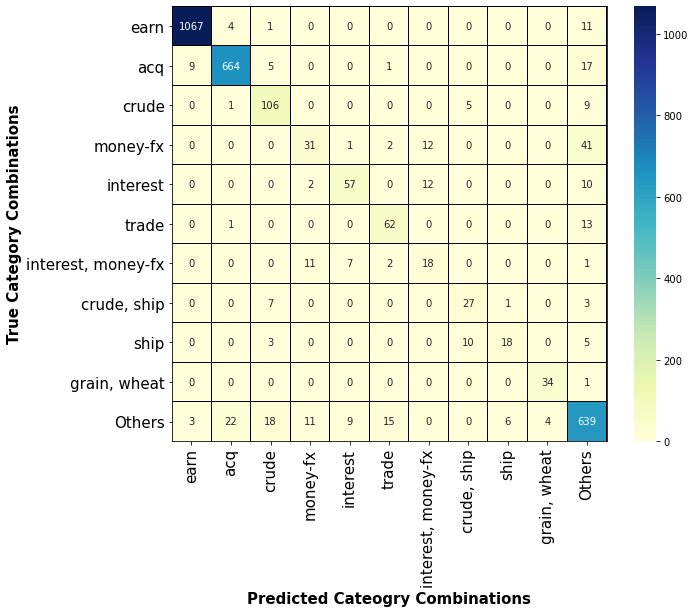

In [39]:
cm = confusion_matrix(target_label_maj, predict_label_maj, labels =  np.append(majority_class, 'Others'))
#cmn = cm / cm.sum(axis=1)[:, np.newaxis] # normalize by each row

fig, axs = plt.subplots(1,1,figsize=(10, 8))
ws = 15
objects =  np.append(majority_class, 'Others')
heat_map = sns.heatmap(cm, annot = True, fmt="d", cmap="YlGnBu", square = True,linewidths=0.01, linecolor='black',rasterized=False)
# make frame visible YlGnBu
for _, spine in heat_map.spines.items():
    spine.set_visible(True)
plt.yticks(np.arange(0.5, len(objects), 1), objects, fontsize = ws, rotation = 0)
plt.xticks(np.arange(0.5, len(objects), 1), objects, fontsize = ws, rotation=90)
plt.xlabel('Predicted Cateogry Combinations',fontsize=ws, weight = 'bold')
plt.ylabel('True Category Combinations',fontsize=ws, weight = 'bold')
plt.savefig('object_confusion_matrix.png')

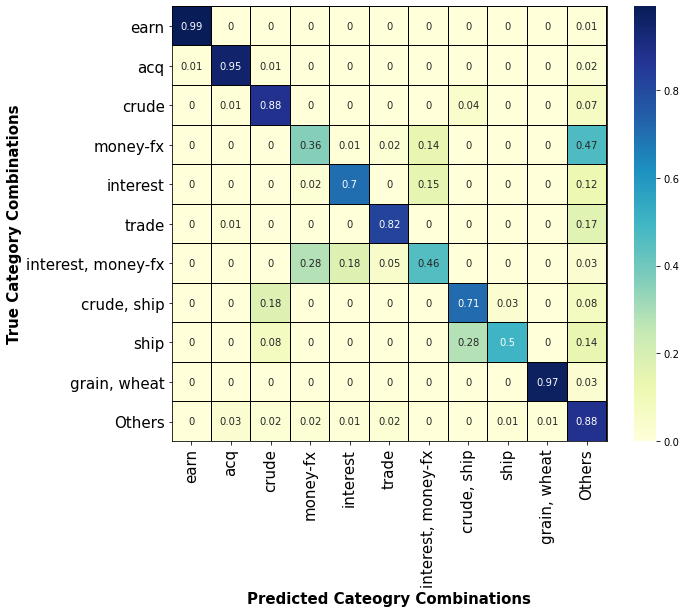

In [40]:
cm = confusion_matrix(target_label_maj, predict_label_maj, labels =  np.append(majority_class, 'Others'))
cmn = cm / cm.sum(axis=1)[:, np.newaxis] # normalize by each row
cmn = np.round(cmn, 2)

fig, axs = plt.subplots(1,1,figsize=(10, 8))
ws = 15
objects =  np.append(majority_class, 'Others')
heat_map = sns.heatmap(cmn, annot = True, cmap="YlGnBu", square = True,linewidths=0.01, linecolor='black',rasterized=False)
# make frame visible YlGnBu
for _, spine in heat_map.spines.items():
    spine.set_visible(True)
plt.yticks(np.arange(0.5, len(objects), 1), objects, fontsize = ws, rotation = 0)
plt.xticks(np.arange(0.5, len(objects), 1), objects, fontsize = ws, rotation=90)
plt.xlabel('Predicted Cateogry Combinations',fontsize=ws, weight = 'bold')
plt.ylabel('True Category Combinations',fontsize=ws, weight = 'bold')
plt.savefig('object_confusion_matrix.png')

In [68]:
wrong_predictions = []

for i in range(len(target_label)):
    if target_label[i] == 'money-fx' and predict_label[i] not in majority_class:
        if predict_label[i] == '':
            wrong_predictions.append([target_label[i], 'no label'])
        else:
            wrong_predictions.append([target_label[i], predict_label[i]])

In [69]:
wrong_predictions = pd.DataFrame(wrong_predictions)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

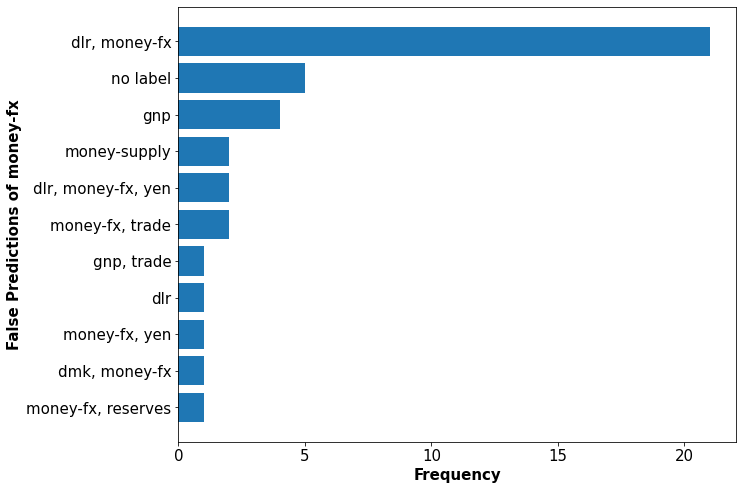

In [84]:
fig, axs = plt.subplots(1,1,figsize=(10, 8))
wrong_predictions.columns = ['target_label', 'predictions']
wrong_predictions[wrong_predictions['predictions'] == '']['predictions'] = 'no category'
count_freq = wrong_predictions['predictions'].value_counts()
count_freq = pd.DataFrame(count_freq).reset_index()
count_freq.columns = ['label', 'frequency']
count_freq = count_freq.sort_values(by = ['frequency'])

plt.barh(count_freq['label'], count_freq['frequency']) 
plt.ylabel('False Predictions of money-fx',fontsize=ws, weight = 'bold')
plt.xlabel('Frequency',fontsize=ws, weight = 'bold')
plt.xticks(np.arange(0, 25, 5), fontsize = 15)
plt.yticks(fontsize = 15)

In [82]:
count_freq

label  frequency
0        dlr, money-fx         21
1             no label          5
2                  gnp          4
3      money-fx, trade          2
4   dlr, money-fx, yen          2
5         money-supply          2
6   money-fx, reserves          1
7        dmk, money-fx          1
8        money-fx, yen          1
9                  dlr          1
10          gnp, trade          1

In [61]:
wrong_predictions

target_label         predictions
0      money-fx                 gnp
1      money-fx                    
2      money-fx                    
3      money-fx       dlr, money-fx
4      money-fx       money-fx, yen
5      money-fx       dlr, money-fx
6      money-fx  dlr, money-fx, yen
7      money-fx     money-fx, trade
8      money-fx                    
9      money-fx                    
10     money-fx       dlr, money-fx
11     money-fx  money-fx, reserves
12     money-fx       dlr, money-fx
13     money-fx       dlr, money-fx
14     money-fx        money-supply
15     money-fx     money-fx, trade
16     money-fx  dlr, money-fx, yen
17     money-fx                 dlr
18     money-fx       dlr, money-fx
19     money-fx       dlr, money-fx
20     money-fx       dlr, money-fx
21     money-fx       dlr, money-fx
22     money-fx        money-supply
23     money-fx       dlr, money-fx
24     money-fx       dlr, money-fx
25     money-fx       dlr, money-fx
26     money-fx       dlr, money-fx
27     money-fx       dlr, money-fx
28     money-fx          gnp, trade
29     money-fx       dlr, money-fx
30     money-fx       dlr, money-fx
31     money-fx                    
32     money-fx       dlr, money-fx
33     money-fx       dlr, money-fx
34     money-fx       dlr, money-fx
35     money-fx       dlr, money-fx
36     money-fx                 gnp
37     money-fx       dlr, money-fx
38     money-fx                 gnp
39     money-fx       dmk, money-fx
40     money-fx                 gnp

In [102]:
predict_label = []
for i in range(svmPreds.shape[0]):
    tmp = ''
    for k in range(svmPreds.shape[1]):
        if svmPreds[i, k] == 1:
            if tmp != '':
                tmp += ', '

            tmp += object_class[k]
            

    predict_label.append(tmp)
    
target_label = []
for i in range(label_test.shape[0]):
    tmp = ''
    for k in range(label_test.shape[1]):
        if label_test[i, k] == 1:
            if tmp != '':
                tmp += ', '
                
            tmp += object_class[k]


    target_label.append(tmp)
    
counter=collections.Counter(target_label)

counter = pd.DataFrame.from_dict(counter, orient='index').reset_index()
counter.columns = ['object_combinations', 'frequency']
counter = counter.sort_values(by = ['frequency'], ascending=False).reset_index(drop = True)
counter

object_combinations  frequency
0                         earn       1083
1                          acq        696
2                        crude        121
3                     money-fx         87
4                     interest         81
..                         ...        ...
222                  acq, alum          1
223     cpi, gnp, money-supply          1
224  grain, meal-feed, oilseed          1
225             gold, platinum          1
226    dlr, dmk, money-fx, yen          1

[227 rows x 2 columns]

In [103]:
majority_class = counter[counter['frequency'] > 30]['object_combinations'].values
majority_class

array(['earn', 'acq', 'crude', 'money-fx', 'interest', 'trade',
       'interest, money-fx', 'crude, ship', 'ship', 'grain, wheat'],
      dtype=object)

In [104]:
majority_class = counter[counter['frequency'] > 30]['object_combinations'].values

target_label_maj = []
predict_label_maj = []
for i in range(len(target_label)):
    if target_label[i] in majority_class:
        target_label_maj.append(target_label[i])
    else:
        target_label_maj.append('Others')
        
    if predict_label[i] in majority_class:
        predict_label_maj.append(predict_label[i])
    else:
        predict_label_maj.append('Others')

'''
for i in range(len(target_label)):
    if target_label[i] in majority_class:
        target_label_maj.append(target_label[i])
        predict_label_maj.append(predict_label[i])
        
    else:
        target_label_maj.append('Others')
        predict_label_maj.append(predict_label[i])
'''

"\nfor i in range(len(target_label)):\n    if target_label[i] in majority_class:\n        target_label_maj.append(target_label[i])\n        predict_label_maj.append(predict_label[i])\n        \n    else:\n        target_label_maj.append('Others')\n        predict_label_maj.append(predict_label[i])\n"

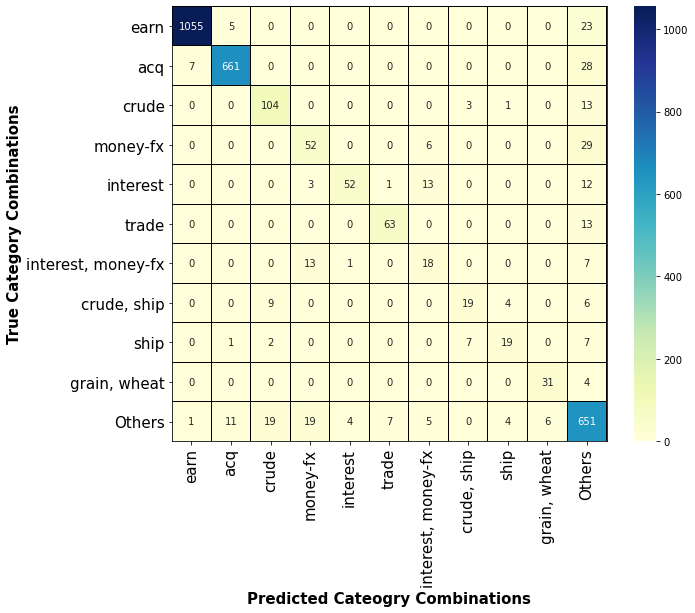

In [105]:
cm = confusion_matrix(target_label_maj, predict_label_maj, labels =  np.append(majority_class, 'Others'))
#cmn = cm / cm.sum(axis=1)[:, np.newaxis] # normalize by each row

fig, axs = plt.subplots(1,1,figsize=(10, 8))
ws = 15
objects =  np.append(majority_class, 'Others')
heat_map = sns.heatmap(cm, annot = True, fmt="d", cmap="YlGnBu", square = True,linewidths=0.01, linecolor='black',rasterized=False)
# make frame visible YlGnBu
for _, spine in heat_map.spines.items():
    spine.set_visible(True)
plt.yticks(np.arange(0.5, len(objects), 1), objects, fontsize = ws, rotation = 0)
plt.xticks(np.arange(0.5, len(objects), 1), objects, fontsize = ws, rotation=90)
plt.xlabel('Predicted Cateogry Combinations',fontsize=ws, weight = 'bold')
plt.ylabel('True Category Combinations',fontsize=ws, weight = 'bold')
plt.savefig('object_confusion_matrix.png')

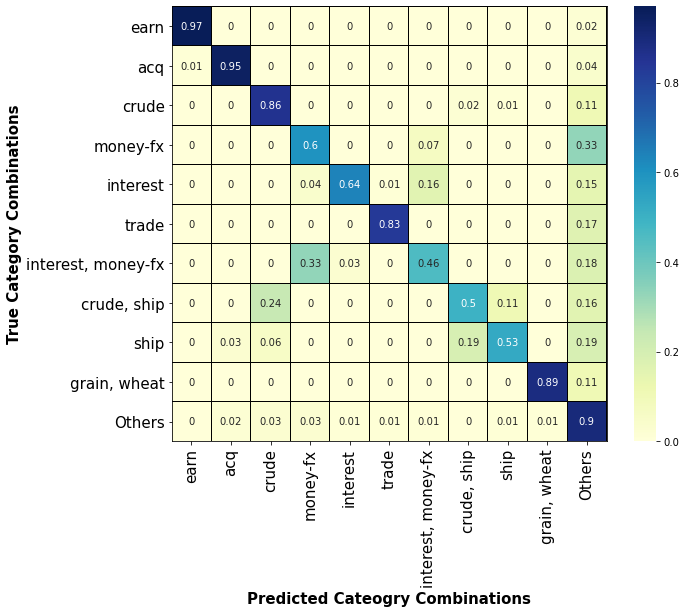

In [106]:
cm = confusion_matrix(target_label_maj, predict_label_maj, labels =  np.append(majority_class, 'Others'))
cmn = cm / cm.sum(axis=1)[:, np.newaxis] # normalize by each row
cmn = np.round(cmn, 2)

fig, axs = plt.subplots(1,1,figsize=(10, 8))
ws = 15
objects =  np.append(majority_class, 'Others')
heat_map = sns.heatmap(cmn, annot = True, cmap="YlGnBu", square = True,linewidths=0.01, linecolor='black',rasterized=False)
# make frame visible YlGnBu
for _, spine in heat_map.spines.items():
    spine.set_visible(True)
plt.yticks(np.arange(0.5, len(objects), 1), objects, fontsize = ws, rotation = 0)
plt.xticks(np.arange(0.5, len(objects), 1), objects, fontsize = ws, rotation=90)
plt.xlabel('Predicted Cateogry Combinations',fontsize=ws, weight = 'bold')
plt.ylabel('True Category Combinations',fontsize=ws, weight = 'bold')
plt.savefig('object_confusion_matrix.png')

In [109]:
wrong_predictions = []

for i in range(len(target_label)):
    if target_label[i] == 'money-fx' and predict_label[i] not in majority_class:
        if predict_label[i] == '':
            wrong_predictions.append([target_label[i], 'no label'])
        else:
            wrong_predictions.append([target_label[i], predict_label[i]])
wrong_predictions = pd.DataFrame(wrong_predictions)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

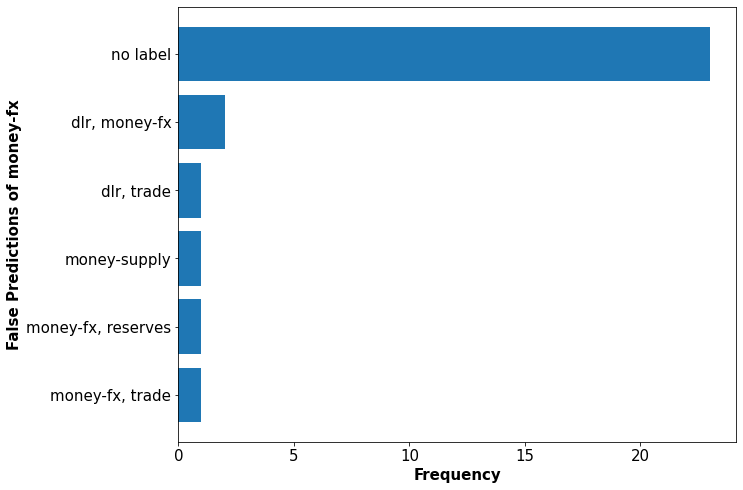

In [110]:
fig, axs = plt.subplots(1,1,figsize=(10, 8))
wrong_predictions.columns = ['target_label', 'predictions']
wrong_predictions[wrong_predictions['predictions'] == '']['predictions'] = 'no category'
count_freq = wrong_predictions['predictions'].value_counts()
count_freq = pd.DataFrame(count_freq).reset_index()
count_freq.columns = ['label', 'frequency']
count_freq = count_freq.sort_values(by = ['frequency'])

plt.barh(count_freq['label'], count_freq['frequency']) 
plt.ylabel('False Predictions of money-fx',fontsize=ws, weight = 'bold')
plt.xlabel('Frequency',fontsize=ws, weight = 'bold')
plt.xticks(np.arange(0, 25, 5), fontsize = 15)
plt.yticks(fontsize = 15)

In [151]:
from nltk.corpus import reuters
import nltk
#nltk.download('reuters')
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## for bert language model
import transformers
import re, string

from collections import Counter
import multiprocessing
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN,RNN, LSTM
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense
import tensorflow as tf

import gensim
import gensim.downloader as gensim_api
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
## for word embedding
nlp = gensim_api.load("word2vec-google-news-300")

In [179]:
# from https://github.com/giannisnik/mpad/blob/master/mpad/utils.py
def load_embeddings(model, vocab):
    word_vecs = np.zeros((len(vocab)+1, 300))
    unknown_words = set()
    #unknown_words_list = []
    #model = KeyedVectors.load_word2vec_format(fname, binary=True)
    for word in vocab:
        if word in model:
            word_vecs[vocab[word],:] = model[word]
        else:
            unknown_words.add(word)
            #unknown_words_list.append(word)
            word_vecs[vocab[word],:] = np.random.uniform(-0.25, 0.25, 300)
    print("Existing vectors:", len(vocab)-len(unknown_words))
    return word_vecs, unknown_words#, unknown_words_list

def get_vocab(docs):
    vocab = dict()
    
    for index, row in docs.iterrows():
        doc = row['content'].split()
        
        for word in doc:
            if word not in vocab:
                vocab[word] = len(vocab)+1

    print("Vocabulary size: ", len(vocab))
        
    return vocab

In [212]:
wordnet_lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stopwords = set(w.rstrip() for w in open("../../nltk_data/corpora/reuters/stopwords"))

def tokenize_lemma_stopwords(text):
    text = text.replace("\n", " ")
    tokens = nltk.tokenize.word_tokenize(text.lower()) # split string into words (tokens)
    tokens = [t for t in tokens if t.isalpha()] # keep strings with only alphabets
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    #tokens = [stemmer.stem(t) for t in tokens]
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
    cleanedText = " ".join(tokens)
    return cleanedText

def dataCleaning(df):
    data = df.copy()
    data["content"] = data["content"].apply(tokenize_lemma_stopwords)
    return data

In [213]:
cleanedTrainData = dataCleaning(trainDf)
cleanedTestData = dataCleaning(testDf)

In [214]:
vocab = get_vocab(pd.concat([cleanedTrainData, cleanedTestData]))
embeddings, unknown_words = load_embeddings(nlp, vocab)

Vocabulary size:  24811
Existing vectors: 15698


In [215]:
pd.DataFrame(unknown_words).to_csv('unknownwords.csv')

In [216]:
unknown_words

{'buenaventura',
 'oel',
 'photronics',
 'imnet',
 'heidweiler',
 'rtb',
 'dusseldorf',
 'kandeel',
 'sendi',
 'coleco',
 'ridgecrest',
 'developoment',
 'cccr',
 'mci',
 'hde',
 'kji',
 'cayuga',
 'mackoff',
 'lfio',
 'joliet',
 'zegl',
 'atng',
 'gruen',
 'volusia',
 'amadeus',
 'kharrazi',
 'undeground',
 'gakuen',
 'presticide',
 'alejandro',
 'pennell',
 'forsyth',
 'ogelbay',
 'checkrobot',
 'zollinger',
 'hangzhou',
 'nurukawa',
 'knut',
 'ingemar',
 'booklyn',
 'gnr',
 'cso',
 'stabilising',
 'sttement',
 'yassin',
 'habre',
 'vstr',
 'quartger',
 'siebel',
 'warrenton',
 'giordano',
 'aepi',
 'stuttgart',
 'heublin',
 'upco',
 'ahc',
 'rapp',
 'mgll',
 'misima',
 'teleproductions',
 'balletto',
 'cahit',
 'soctt',
 'hpu',
 'trinova',
 'palle',
 'accuray',
 'ksu',
 'timex',
 'morita',
 'marriott',
 'organiaation',
 'sabhavasu',
 'crompton',
 'banponce',
 'towle',
 'btlr',
 'interpart',
 'mustapha',
 'rcp',
 'skii',
 'figueras',
 'tilney',
 'medan',
 'harbin',
 'carolian',
 'gos

In [218]:
24811 - 15698

9113

In [222]:
len(unknown_words)

9113

In [224]:
tmp = pd.DataFrame(np.zeros([1, len(unknown_words)]), columns = unknown_words)
tmp

buenaventura  oel  photronics  imnet  heidweiler  rtb  dusseldorf  kandeel  \
0           0.0  0.0         0.0    0.0         0.0  0.0         0.0      0.0   

   sendi  coleco  ...  struthers  gelch  reaan  wessanen  societa  hashimoto  \
0    0.0     0.0  ...        0.0    0.0    0.0       0.0      0.0        0.0   

   batus  sanivan  josten  ovest  
0    0.0      0.0     0.0    0.0  

[1 rows x 9113 columns]

In [225]:
for index, row in pd.concat([cleanedTrainData, cleanedTestData]).iterrows():
        doc = row['content'].split()
        for word in doc:
            if word in unknown_words:
                tmp[word][0] += 1
                
        print (index)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064


3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715


5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364


6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007


891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112

2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755


In [226]:
tmp

buenaventura  oel  photronics  imnet  heidweiler  rtb  dusseldorf  kandeel  \
0           2.0  1.0         0.0    1.0         0.0  3.0         4.0      1.0   

   sendi  coleco  ...  struthers  gelch  reaan  wessanen  societa  hashimoto  \
0    2.0     5.0  ...        0.0    2.0    1.0       6.0      2.0        4.0   

   batus  sanivan  josten  ovest  
0    0.0      4.0     4.0    2.0  

[1 rows x 9113 columns]

In [227]:
tmp = tmp.transpose()

In [228]:
tmp

0
buenaventura  2.0
oel           1.0
photronics    0.0
imnet         1.0
heidweiler    0.0
...           ...
hashimoto     4.0
batus         0.0
sanivan       4.0
josten        4.0
ovest         2.0

[9113 rows x 1 columns]

In [229]:
tmp.columns = ['frequency']
tmp = tmp.sort_values(by = ['frequency'], ascending = 'True')


In [230]:
tmp.to_csv('unknow_words_frequency.csv')

In [202]:
filename

['training/1',
 'training/10',
 'training/100',
 'training/1000',
 'training/10000',
 'training/10002',
 'training/10005',
 'training/10008',
 'training/10011',
 'training/10014',
 'training/10015',
 'training/10018',
 'training/10023',
 'training/10025',
 'training/10027',
 'training/1003',
 'training/10032',
 'training/10035',
 'training/10037',
 'training/10038',
 'training/10040',
 'training/10041',
 'training/10042',
 'training/10043',
 'training/10046',
 'training/10048',
 'training/10049',
 'training/10050',
 'training/10052',
 'training/10053',
 'training/10054',
 'training/10057',
 'training/10058',
 'training/10061',
 'training/10062',
 'training/10064',
 'training/10065',
 'training/10066',
 'training/10067',
 'training/10068',
 'training/1007',
 'training/10071',
 'training/10073',
 'training/10074',
 'training/10075',
 'training/10076',
 'training/10078',
 'training/10079',
 'training/1008',
 'training/10080',
 'training/10081',
 'training/10083',
 'training/10085',
 'trai

In [207]:
for index, row in pd.concat([cleanedTrainData, cleanedTestData]).iterrows():
        doc = row['content'].split()
        print (doc)
        for i in range(len(doc)):
            if doc[i] == 'compani':
                print (i)
                break
        #break

['bahia', 'cocoa', 'review', 'shower', 'continu', 'week', 'bahia', 'cocoa', 'zone', 'allevi', 'drought', 'sinc', 'earli', 'januari', 'improv', 'prospect', 'temporao', 'normal', 'humid', 'level', 'restor', 'comissaria', 'smith', 'weekli', 'review', 'dri', 'period', 'temporao', 'late', 'thi', 'year', 'arriv', 'week', 'end', 'februari', 'bag', 'kilo', 'make', 'cumul', 'total', 'season', 'mln', 'stage', 'year', 'cocoa', 'deliv', 'earlier', 'consign', 'includ', 'arriv', 'figur', 'comissaria', 'smith', 'doubt', 'crop', 'cocoa', 'avail', 'harvest', 'practic', 'end', 'total', 'bahia', 'crop', 'estim', 'mln', 'bag', 'sale', 'stand', 'mln', 'hundr', 'thousand', 'bag', 'hand', 'farmer', 'middleman', 'export', 'processor', 'doubt', 'thi', 'cocoa', 'fit', 'export', 'shipper', 'experienc', 'dificulti', 'obtain', 'certif', 'view', 'lower', 'qualiti', 'recent', 'week', 'farmer', 'sold', 'good', 'part', 'cocoa', 'held', 'consign', 'comissaria', 'smith', 'spot', 'bean', 'price', 'rose', 'cruzado', 'arro

['hanson', 'trust', 'sell', 'chemic', 'unit', 'hanson', 'trust', 'plc', 'subsidiari', 'hanson', 'industri', 'sell', 'pcr', 'special', 'chemic', 'unit', 'mln', 'dlr', 'cash', 'chemic', 'partner', 'pcr', 'sale', 'mln', 'dlr', 'fiscal', 'oper', 'loss', 'dlr']
['investor', 'paul', 'bilzerian', 'pct', 'pay', 'pak', 'stake', 'seek', 'control', 'investor', 'paul', 'bilzerian', 'pct', 'pay', 'pak', 'stake', 'seek', 'control']
['revok', 'japanes', 'financi', 'licens', 'british', 'govern', 'revok', 'licenc', 'select', 'japanes', 'bank', 'secur', 'compani', 'oper', 'london', 'financi', 'citi', 'renew', 'summer', 'progress', 'made', 'open', 'japan', 'market', 'foreign', 'competit', 'govern', 'sourc', 'revok', 'licenc', 'thi', 'definit', 'consid', 'offici', 'comment', 'govern', 'formal', 'urg', 'today', 'influenti', 'joint', 'retaliatori', 'action', 'unit', 'state', 'japan', 'britain', 'grown', 'increasingli', 'impati', 'japanes', 'trade', 'practic', 'sens', 'urgenc', 'emphasi', 'secur', 'undermin'

['sugar', 'import', 'latest', 'week', 'usda', 'sugar', 'import', 'subject', 'sugar', 'import', 'quota', 'dure', 'week', 'end', 'march', 'total', 'short', 'ton', 'versu', 'ton', 'previou', 'week', 'agricultur', 'depart', 'cumul', 'import', 'total', 'ton', 'sugar', 'import', 'quota', 'quota', 'year', 'set', 'short', 'ton', 'compar', 'ton', 'quota', 'year', 'extend', 'month', 'decemb', 'depart', 'custom', 'servic', 'report', 'weekli', 'cumul', 'import', 'report', 'actual', 'weight', 'basi', 'final', 'polar', 'receiv', 'cumul', 'import', 'data', 'adjust', 'accordingli']
['templeton', 'energi', 'tmpl', 'qtr', 'net', 'shr', 'profit', 'loss', 'net', 'profit', 'loss', 'rev', 'mln', 'mln', 'year', 'shr', 'profit', 'loss', 'net', 'profit', 'rev', 'mln', 'mln', 'note', 'includ', 'result', 'louisiana', 'energi', 'develop', 'corp', 'acquir', 'novemb']
['ael', 'industri', 'aelna', 'qtr', 'feb', 'net', 'shr', 'net', 'rev', 'mln', 'mln', 'mth', 'shr', 'dlr', 'net', 'rev', 'mln', 'mln', 'note', 'year',

23
['philadelphia', 'suburban', 'psc', 'buy', 'softwar', 'firm', 'philadelphia', 'suburban', 'corp', 'acquir', 'mentor', 'system', 'lexington', 'comput', 'softwar', 'compani', 'common', 'stock', 'detail', 'term', 'disclos', 'mentor', 'special', 'public', 'sector', 'account', 'system', 'employe', 'lexington', 'facil', 'branch', 'offic', 'midwest', 'york']
15
['pacif', 'account', 'chang', 'reduc', 'net', 'mln', 'dlr', 'pacif', 'account', 'chang', 'reduc', 'net', 'mln', 'dlr']
['tsfc', 'qtr', 'loss', 'shr', 'loss', 'nil', 'net', 'loss', 'profit', 'year', 'shr', 'loss', 'profit', 'net', 'loss', 'profit', 'note', 'earn', 'restat', 'discontinu', 'oper', 'result', 'reflect', 'payment', 'prefer', 'dividend', 'compani', 'releas', 'revenu']
26
['barring', 'resourc', 'barr', 'year', 'end', 'dec', 'shr', 'profit', 'loss', 'net', 'profit', 'loss', 'rev', 'note', 'net', 'includ', 'dlr', 'share', 'gain', 'cancel', 'debt', 'debentur', 'offer']
['concord', 'fabric', 'qtr', 'oper', 'net', 'end', 'march'

['news', 'corp', 'start', 'hpr', 'bid', 'news', 'corp', 'australia', 'start', 'previous', 'announc', 'tender', 'offer', 'share', 'harper', 'row', 'publish', 'dlr', 'share', 'newspap', 'advertis', 'compani', 'offer', 'condit', 'receiv', 'pct', 'harper', 'row', 'share', 'offer', 'withdraw', 'expir', 'april', 'extend', 'merger', 'tender', 'price', 'follow', 'offer', 'approv', 'harper', 'row', 'board', 'harper', 'row', 'grant', 'corp', 'option', 'buy', 'share', 'pct', 'interest', 'dlr', 'news', 'corp', 'merger', 'agreement', 'termin', 'circumst', 'news', 'entitl', 'mln', 'dlr', 'cash', 'payment', 'month', 'theodor', 'cross', 'offer', 'acquir', 'harper', 'row', 'dlr', 'share', 'outbid', 'harcourt', 'brace', 'jovanovich', 'offer', 'dlr', 'share', 'late', 'month', 'harper', 'row', 'board', 'receiv', 'express', 'interest', 'number', 'domest', 'foreign', 'compani']
21
['intern', 'technolog', 'itx', 'qtr', 'loss', 'intern', 'technolog', 'corp', 'expect', 'report', 'loss', 'fourth', 'quarter', 'e

['texa', 'petroleum', 'acquir', 'oil', 'properti', 'texa', 'petroleum', 'corp', 'issu', 'mln', 'share', 'restrict', 'common', 'stock', 'exchang', 'oil', 'properti', 'joint', 'ventur', 'locat', 'oversea', 'properti', 'acquir', 'north', 'american', 'oil', 'corp', 'texa', 'petroleum', 'corp', 'canada', 'compani', 'acquisit', 'step', 'creat', 'oil', 'explor', 'develop', 'enterpris']
31
['metromedia', 'buy', 'warrant', 'share', 'orion', 'metromedia', 'purchas', 'time', 'home', 'box', 'offic', 'warrant', 'purchas', 'share', 'common', 'stock', 'orion', 'pictur', 'corp', 'opc', 'price', 'warrant', 'mln', 'dlr', 'metromedia', 'pct', 'outstand', 'common', 'stock', 'orion']
['bank', 'montreal', 'lower', 'credit', 'card', 'rate', 'bank', 'montreal', 'reduc', 'interest', 'rate', 'charg', 'outstand', 'mastercard', 'balanc', 'pct', 'pct', 'begin', 'juli', 'bank', 'continu', 'polici', 'charg', 'ani', 'annual', 'fee', 'transact', 'fee', 'credit', 'card', 'holder']
['kasler', 'corp', 'kasl', 'qtr', 'jan

['senat', 'proxmir', 'urg', 'curb', 'takeov', 'senat', 'bank', 'committe', 'chairman', 'william', 'proxmir', 'call', 'curb', 'hostil', 'corpor', 'takeov', 'restrict', 'risk', 'arbitrageur', 'veri', 'high', 'time', 'requir', 'risk', 'arbitrageur', 'regist', 'seper', 'specif', 'secur', 'exchang', 'commiss', 'consid', 'preclud', 'brokerag', 'firm', 'employ', 'invest', 'ani', 'secur', 'issu', 'parti', 'risk', 'arbitrag', 'oper', 'proxmir', 'start', 'hear', 'corpor', 'takeov', 'burn', 'issu', 'complet', 'seper', 'futur', 'risk', 'arbitrag', 'invest', 'bank', 'proxmir', 'concern', 'hostil', 'takeov', 'attempt', 'hurt', 'economi', 'view', 'share', 'corpor', 'execut', 'tesitifi', 'hear', 'believ', 'takeov', 'becom', 'abus', 'tilt', 'favor', 'financi', 'buccan', 'remedi', 'action', 'requir', 'usx', 'corp', 'chairman', 'david', 'roderick', 'congress', 'takeov', 'game', 'continu', 'uncheck', 'econom', 'suicid', 'champion', 'intern', 'corp', 'chairman', 'andrew', 'sigler']
['poehl', 'warn', 'dolla

['unusu', 'dri', 'weather', 'affect', 'china', 'agricultur', 'abnorm', 'warm', 'dri', 'weather', 'part', 'china', 'affect', 'crop', 'china', 'news', 'agenc', 'drought', 'made', 'rice', 'plant', 'difficult', 'provinc', 'includ', 'guangxi', 'sichuan', 'hunan', 'plant', 'diseas', 'insect', 'pest', 'increas', 'area', 'agenc', 'area', 'guangxi', 'hubei', 'shanxi', 'provinc', 'suffer', 'drought', 'month', 'agenc', 'dri', 'weather', 'reduc', 'amount', 'water', 'store', 'pct', 'compar', 'march', 'lower', 'water', 'level', 'mani', 'river', 'reduc', 'hydroelectr', 'power', 'suppli', 'caus', 'water', 'shortag', 'industri', 'consum', 'upper', 'reach', 'yangtz', 'lowest', 'level', 'centuri', 'caus', 'mani', 'ship', 'run', 'aground', 'make', 'harbour', 'manoeuvr', 'difficult', 'drought', 'increas', 'number', 'forest', 'fire', 'fire', 'southern', 'china', 'destroy', 'hectar', 'forest']
['taiwan', 'shipbuild', 'japanes', 'ventur', 'taiwan', 'china', 'shipbuild', 'corp', 'csbc', 'plan', 'seek', 'joint'

['wilshir', 'woc', 'chief', 'jacob', 'jec', 'board', 'wilshir', 'oil', 'texa', 'pct', 'stake', 'jacob', 'engin', 'group', 'chairman', 'siggi', 'wilzig', 'appoint', 'jabob', 'board', 'file', 'secur', 'exchang', 'commiss', 'wilshir', 'hold', 'jacob', 'common', 'share', 'wilzig', 'appoint', 'jacob', 'board', 'director', 'march', 'compani', 'annual', 'sharehold', 'meet', 'wilshir', 'jacob', 'chairman', 'joseph', 'jacob', 'agre', 'recommend', 'wilshir', 'nomine', 'elect', 'board', 'person', 'found', 'qualifi']
35
['februari', 'retail', 'sale', 'sign', 'upturn', 'retail', 'post', 'stronger', 'expect', 'sale', 'februari', 'prompt', 'analyst', 'chang', 'expect', 'sluggish', 'sale', 'growth', 'half', 'feel', 'februari', 'borrow', 'busi', 'normal', 'quarter', 'real', 'strength', 'gener', 'merchandis', 'sale', 'half', 'bear', 'stearn', 'analyst', 'monro', 'greenstein', 'march', 'strong', 'becaus', 'easter', 'fall', 'april', 'thi', 'year', 'morgan', 'stanley', 'analyst', 'walter', 'loeb', 'analyst

['physician', 'insur', 'pico', 'qtr', 'net', 'shr', 'net', 'dlr', 'dlr', 'rev', 'mln', 'dlr', 'mln', 'dlr', 'avg', 'shr', 'mth', 'shr', 'dlr', 'net', 'dlr', 'dlr', 'rev', 'mln', 'dlr', 'mln', 'dlr', 'avg', 'shr', 'note', 'share', 'amount', 'qtr', 'year', 'prior', 'restat', 'reflect', 'stock', 'split', 'august', 'rev', 'qtr', 'includ', 'capit', 'gain', 'year', 'rev', 'qtr', 'includ', 'revenu', 'year', 'rev', 'qtr', 'includ', 'life', 'subsidiari', 'account', 'deposit', 'year']
['bradley', 'brli', 'announc', 'leas', 'bradley', 'real', 'estat', 'trust', 'sign', 'leas', 'properti', 'downtown', 'minneapoli', 'bced', 'minnesota', 'leas', 'increas', 'net', 'incom', 'share', 'stock', 'split', 'basi', 'trust', 'report', 'net', 'incom', 'mln', 'dlr', 'share', 'basi', 'bradley', 'entitl', 'addit', 'rental', 'payment', 'share', 'bced', 'enter', 'space', 'leas', 'prime', 'nation', 'tenant', 'share', 'portion', 'net', 'cash', 'flow', 'oper', 'properti']
['dumez', 'unit', 'pct', 'westburn', 'wbi', 'du

['iranian', 'oil', 'minist', 'uae', 'talk', 'iranian', 'oil', 'minist', 'gholamreza', 'aqazadeh', 'unit', 'arab', 'emir', 'uae', 'discu', 'oil', 'price', 'gener', 'market', 'situat', 'iranian', 'offici', 'accompani', 'meet', 'uae', 'presid', 'sheikh', 'zaid', 'bin', 'sultan', 'oil', 'minist', 'mana', 'aqazadeh', 'arriv', 'night', 'stopov', 'riyadh', 'met', 'saudi', 'arabia', 'oil', 'minist', 'hisham', 'nazir', 'offici', 'saudi', 'press', 'agenc', 'quot', 'talk', 'riyadh', 'nazir', 'construct', 'good', 'aqazadeh', 'organis', 'petroleum', 'export', 'countri', 'opec', 'member', 'agre', 'hold', 'product', 'stabl', 'reiter', 'import', 'maintain', 'oil', 'price', 'opec', 'member', 'agre', 'decemb', 'limit', 'product', 'mln', 'barrel', 'day', 'half', 'thi', 'year', 'benchmark', 'price', 'dlr', 'barrel', 'februari', 'aqazadeh', 'vist', 'opec', 'member', 'gabon', 'algeria', 'libya', 'iranian', 'news', 'agenc', 'irna', 'quot', 'befor', 'leav', 'tripoli', 'opec', 'everyth', 'possibl', 'make', 'oi

['ste', 'lyonnais', 'eaux', 'year', 'end', 'dec', 'consolid', 'attribut', 'net', 'profit', 'mln', 'franc', 'mln', 'parent', 'compani', 'net', 'profit', 'mln', 'mln']
14
['lyonnais', 'eaux', 'forecast', 'profit', 'rise', 'consolid', 'attribut', 'net', 'profit', 'ste', 'lyonnais', 'eaux', 'rise', 'pct', 'thi', 'year', 'mln', 'franc', 'report', 'chairman', 'jerom', 'monod', 'told', 'news', 'confer', 'group', 'turnov', 'rise', 'pct', 'mln', 'report', 'thi', 'year', 'group', 'invest', 'total', 'billion', 'franc', 'abov', 'billion', 'annual', 'averag', 'past', 'year', 'invest', 'aim', 'mainli', 'develop', 'group', 'leisur', 'industri', 'health', 'commun', 'activ', 'monod', 'leisur', 'sector', 'group', 'plan', 'joint', 'develop', 'club', 'mediterrane', 'club', 'med', 'hectar', 'pleasur', 'park', 'puisay', 'yonn', 'depart', 'eastern', 'central', 'franc', 'subsidiari', 'lyonnais', 'developp', 'touristiqu', 'carri', 'construct', 'work', 'financi', 'plan', 'develop', 'leas', 'club', 'med', 'oper'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['japan', 'tri', 'expand', 'domest', 'demand', 'japan', 'assur', 'meet', 'trade', 'minist', 'make', 'everi', 'effort', 'expand', 'domest', 'demand', 'restructur', 'economi', 'japanes', 'trade', 'repres', 'tsomu', 'hata', 'told', 'inform', 'gener', 'agreement', 'tariff', 'trade', 'gatt', 'meet', 'addit', 'demand', 'boost', 'measur', 'adopt', 'septemb', 'comprehens', 'econom', 'program', 'prepar', 'budget', 'approv', 'hata', 'speak', 'session', 'meet', 'agricultur', 'goal', 'restructur', 'economi', 'elabor', 'hata', 'protectionist', 'pressur', 'intern', 'economi', 'strong', 'reflect', 'financi', 'deficit', 'payment', 'imbal', 'seriou', 'unemploy', 'mani', 'countri', 'despit', 'great', 'potenti', 'develop', 'economi', 'confront', 'grave', 'difficulti', 'particularli', 'debt', 'basi', 'talk', 'gatt', 'ministeri', 'declar', 'septemb', 'punta', 'del', 'est', 'uruguay', 'subsequ', 'trade', 'negoti', 'plan', 'agre', 'geneva', 'essenti', 'reaffirm', 'commit', 'implement', 'plan', 'schedul', 'h

['princevil', 'pvdc', 'letter', 'credit', 'qintex', 'brisban', 'westpac', 'bank', 'corp', 'australia', 'issu', 'commit', 'letter', 'provid', 'princevil', 'develop', 'corp', 'letter', 'credit', 'requir', 'qintex', 'propos', 'acquisit', 'princevil', 'letter', 'credit', 'ensur', 'payment', 'princevil', 'conting', 'subordin', 'note', 'distribut', 'sharehold', 'record', 'day', 'immedi', 'follow', 'complet', 'qintex', 'tender', 'princevil', 'share', 'issuanc', 'letter', 'credit', 'subject', 'condit', 'includ', 'appropri', 'document', 'letter', 'expect', 'issu', 'april', 'qintex', 'result', 'extend', 'tender', 'offer', 'princevil', 'share', 'april', 'yesterday', 'receiv', 'share', 'offer']
['advanc', 'comput', 'techniqu', 'actp', 'year', 'net', 'shr', 'net', 'rev', 'mln', 'mln']
['news', 'corp', 'unit', 'correct', 'dividend', 'rate', 'news', 'corp', 'fox', 'televis', 'station', 'subsidiari', 'pay', 'accru', 'dividend', 'dlr', 'share', 'dlr', 'report', 'earlier', 'connect', 'april', 'redempt',

['sugar', 'tender', 'concess', 'rebat', 'grant', 'yesterday', 'sugar', 'tender', 'repres', 'concess', 'produc', 'complaint', 'lose', 'money', 'export', 'outsid', 'bloc', 'trade', 'sourc', 'maximum', 'rebat', 'european', 'currenc', 'unit', 'ecu', 'kilo', 'ecu', 'produc', 'claim', 'obtain', 'equival', 'price', 'offer', 'sale', 'intervent', 'rebat', 'week', 'tender', 'ecu', 'short', 'level', 'produc', 'thought', 'necessari', 'previou', 'week', 'ecu', 'thi', 'level', 'sourc', 'produc', 'offer', 'total', 'tonn', 'sugar', 'intervent', 'appar', 'attempt', 'persuad', 'commiss', 'set', 'higher', 'maximum', 'rebat', 'formal', 'indic', 'commiss', 'intend', 'withdraw', 'offer', 'french', 'german', 'oper', 'involv', 'abl', 'withdraw', 'offer', 'week', 'april', 'sugar', 'offici', 'enter', 'intervent', 'store', 'period', 'normal', 'delay', 'sugar', 'intervent', 'payment', 'made', 'offici', 'commiss', 'buy', 'sugar', 'determin', 'immedi', 'resel', 'move', 'drive', 'market', 'price']
['german', 'feb', 

['time', 'jobless', 'claim', 'fell', 'week', 'applic', 'unemploy', 'insur', 'benefit', 'fell', 'season', 'adjust', 'week', 'end', 'march', 'prior', 'week', 'labor', 'depart', 'number', 'peopl', 'actual', 'receiv', 'benefit', 'regular', 'state', 'program', 'total', 'week', 'end', 'march', 'latest', 'period', 'figur', 'avail', 'previou', 'week']
['clevit', 'industri', 'industri', 'offer', 'dlr', 'share', 'buy', 'compani', 'clevit', 'industri', 'industri', 'offer', 'dlr', 'share', 'buy', 'compani']
7
['suntrust', 'bank', 'sti', 'qtr', 'net', 'shr', 'net', 'mln', 'mln', 'note', 'share', 'adjust', 'split', 'juli', 'result', 'restat', 'pool', 'acquisit', 'nation', 'corp', 'decemb', 'net', 'chargeoff', 'mln', 'dlr', 'mln', 'dlr', 'asset', 'billion', 'dlr', 'pct', 'year', 'earlier', 'deposit', 'billion', 'pct', 'loan', 'billion', 'dlr', 'pct']
['intern', 'thomson', 'report', 'fund', 'intern', 'thomson', 'organis', 'report', 'financi', 'result', 'fund', 'sterl', 'begin', 'jan', 'chang', 'appli'

['rotterdam', 'grain', 'handler', 'port', 'balanc', 'rose', 'graan', 'elev', 'mij', 'gem', 'balanc', 'port', 'grain', 'oilse', 'deriv', 'rose', 'tonn', 'april', 'week', 'earlier', 'arriv', 'tonn', 'discharg', 'tonn', 'week', 'balanc', 'compris', 'tonn', 'grain', 'plu', 'oilse', 'tonn', 'deriv', 'thi', 'week', 'estim', 'arriv', 'total', 'tonn', 'deriv', 'figur', 'cover', 'pct', 'rotterdam', 'traffic', 'product', 'concern']
['lindberg', 'corp', 'lind', 'qtr', 'net', 'shr', 'net', 'sale', 'mln', 'mln', 'avg', 'shr', 'mln', 'mln', 'note', 'net', 'includ', 'gain', 'dlr', 'share', 'proce', 'sale', 'properti']
['german', 'institut', 'warn', 'money', 'suppli', 'west', 'germani', 'lead', 'econom', 'research', 'institut', 'warn', 'excess', 'monetari', 'growth', 'threaten', 'resurg', 'inflat', 'dissent', 'view', 'diw', 'institut', 'west', 'berlin', 'echo', 'recent', 'statement', 'lead', 'bundesbank', 'offici', 'expans', 'year', 'necessarili', 'threaten', 'stabil', 'institut', 'issu', 'joint', 'sp

['busi', 'loan', 'fall', 'billion', 'dlr', 'busi', 'loan', 'book', 'major', 'bank', 'exclud', 'accept', 'fell', 'billion', 'dlr', 'billion', 'dlr', 'week', 'end', 'april', 'feder', 'reserv', 'board', 'fed', 'busi', 'loan', 'includ', 'accept', 'fell', 'billion', 'dlr', 'billion', 'dlr']
['commun', 'satellit', 'corp', 'qtr', 'net', 'shr', 'div', 'prior', 'net', 'mln', 'mln', 'note', 'qtr', 'net', 'mln', 'dlr', 'reserv', 'potenti', 'refund', 'result', 'feder', 'commun', 'commiss', 'continu', 'rate', 'investig', 'compani', 'belief', 'ani', 'refund', 'make', 'materi', 'affect', 'financi', 'posit']
26
['american', 'manag', 'system', 'qtr', 'net', 'shr', 'net', 'rev', 'mln', 'mln', 'avg', 'shr', 'note', 'shr', 'reflect', 'stock', 'split', 'june']
['hytek', 'microsystem', 'qtr', 'loss', 'shr', 'loss', 'loss', 'net', 'loss', 'loss', 'rev', 'avg', 'shr']
['tvi', 'corp', 'year', 'loss', 'shr', 'loss', 'profit', 'net', 'loss', 'profit', 'rev']
['rigg', 'nation', 'corp', 'qtr', 'net', 'shr', 'dlr',

['intern', 'qtr', 'shr', 'net', 'mln', 'mln', 'rev', 'mln', 'mln', 'net', 'includ', 'mln', 'dlr', 'tax', 'loss', 'carryforward']
['merchant', 'report', 'qtr', 'loss', 'merchant', 'nation', 'corp', 'billion', 'dlr', 'asset', 'report', 'loss', 'mln', 'dlr', 'quarter', 'due', 'decis', 'increas', 'provis', 'loss', 'mln', 'dlr', 'mainli', 'due', 'uncertainti', 'surround', 'latin', 'american', 'debt', 'quarter', 'year', 'merchant', 'report', 'net', 'incom', 'mln', 'dlr', 'share', 'result', 'increas', 'loan', 'loss', 'provis', 'bank', 'loan', 'loss', 'increas', 'pct', 'pct', 'bank', 'total', 'loan', 'bank', 'expect', 'report', 'estim', 'net', 'mln', 'dlr']
['venezuelan', 'aluminum', 'firm', 'credit', 'venezuelan', 'state', 'aluminum', 'compani', 'venalum', 'negoti', 'total', 'mln', 'dlr', 'credit', 'abroad', 'plan', 'expans', 'product', 'faciiti', 'financ', 'minist', 'manuel', 'azpurua', 'azpurua', 'spoke', 'report', 'meet', 'repres', 'kreditanstalt', 'fur', 'wiederaufbau', 'kfw', 'bank', 'ge

['barco', 'brc', 'board', 'approv', 'leverag', 'buyout', 'bacro', 'california', 'board', 'approv', 'offer', 'chairman', 'kenneth', 'donner', 'presid', 'michael', 'donner', 'purchas', 'outstand', 'barco', 'common', 'share', 'dlr', 'share', 'leverag', 'transact', 'donner', 'current', 'pct', 'compani', 'outstand', 'share', 'barco', 'vice', 'chairman', 'david', 'grutman', 'famili', 'member', 'pct', 'barco', 'share', 'agre', 'sell', 'stock', 'offer', 'price']
29
['irwin', 'jacob', 'gillett', 'stake', 'investor', 'irwin', 'jacob', 'invest', 'gillett', 'amount', 'pct', 'consum', 'product', 'compani', 'stock', 'jacob', 'made', 'comment', 'respons', 'enquiri', 'comment', 'yesterday', 'gillett', 'rebuf', 'takeov', 'propos', 'revlon', 'agreement', 'compani', 'revlon', 'permiss', 'gillett', 'board', 'befor', 'make', 'offer', 'sharehold', 'board', 'declin', 'grant', 'permiss', 'gillett', 'topic', 'takeov', 'specul', 'sever', 'week', 'stock', 'trade', 'heavili', 'arbitrag', 'believ', 'jacob', 'onli'

['yellow', 'freight', 'system', 'qtr', 'net', 'shr', 'qtli', 'div', 'prior', 'net', 'mln', 'mln', 'rev', 'mln', 'mln', 'mth', 'shr', 'dlr', 'dlr', 'net', 'mln', 'mln', 'rev', 'billion', 'billion', 'note', 'full', 'yellow', 'freight', 'system', 'dividend', 'payabl', 'novemb', 'record', 'novemb']
['raleigh', 'feder', 'save', 'bank', 'qtr', 'shr', 'net', 'mln', 'mth', 'shr', 'net', 'note', 'compani', 'convert', 'stock', 'ownership', 'juli']
12
['florida', 'employ', 'insur', 'qtr', 'shr', 'net', 'mth', 'shr', 'net', 'note', 'full', 'compani', 'florida', 'employ', 'insur']
11
['oak', 'brook', 'qtr', 'net', 'shr', 'net', 'mth', 'shr', 'dlr', 'dlr', 'net', 'note', 'full', 'oak', 'brook', 'bancshar']
['unit', 'servic', 'advisor', 'qtr', 'qtr', 'end', 'sept', 'shr', 'profit', 'loss', 'net', 'profit', 'loss', 'rev', 'avg', 'shr']
['wolohan', 'lumber', 'qtr', 'net', 'shr', 'net', 'sale', 'mln', 'mln', 'mth', 'shr', 'net', 'sale', 'mln', 'mln']
['poehl', 'good', 'chanc', 'currenc', 'stabil', 'bund

['acm', 'electr', 'corp', 'ace', 'qtr', 'oct', 'shr', 'qtli', 'div', 'net', 'rev', 'mln', 'mln', 'note', 'qtr', 'adjust', 'pct', 'stock', 'dividend', 'pain', 'march', 'qtli', 'dividend', 'payabl', 'decemb', 'sharehold', 'record', 'novemb']
['nbi', 'nbi', 'qtr', 'loss', 'sept', 'end', 'shr', 'loss', 'loss', 'net', 'loss', 'loss', 'rev', 'mln', 'mln', 'avg', 'shr', 'note', 'quarter', 'result', 'includ', 'gain', 'repurchas', 'debentur', 'discount', 'market', 'valu']
['avx', 'corp', 'avx', 'qtr', 'oct', 'net', 'shr', 'profit', 'profit', 'net', 'profit', 'profit', 'rev', 'mln', 'mln', 'avg', 'mln', 'mln', 'mth', 'shr', 'profit', 'loss', 'net', 'profit', 'mln', 'loss', 'rev', 'mln', 'mln', 'avg', 'shr', 'mln', 'mln']
['stratu', 'comput', 'qtr', 'net', 'shr', 'net', 'rev', 'mln', 'mln', 'mth', 'shr', 'net', 'mln', 'rev', 'mln', 'mln']
['sosnoff', 'reduc', 'caesar', 'world', 'caw', 'stake', 'york', 'investor', 'martin', 'sosnoff', 'reduc', 'stake', 'caesar', 'world', 'common', 'stock', 'share'

In [208]:
wordnet_lemmatizer.lemmatize('company')

'company'

In [209]:
stemmer.stem('company')

'compani'

In [210]:
nlp

In [211]:
'compani' in nlp

False